In [1]:
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
savedir = Path("output/cnn")

In [3]:
srses = {}
for i in savedir.glob("*.csv"):
    num_ids = int(i.stem.split("-")[1])
    srses[num_ids] = pd.read_csv(i, index_col=0, squeeze=True)

In [4]:
df = pd.DataFrame(srses)

In [5]:
srs = df.mean(axis="rows")

In [6]:
srs = srs.sort_index()

Need to see error bars to get a better picture.

In [7]:
tidydf = df.melt()
tidydf = tidydf.rename(columns={"variable": "num_id", "value": "acc"})

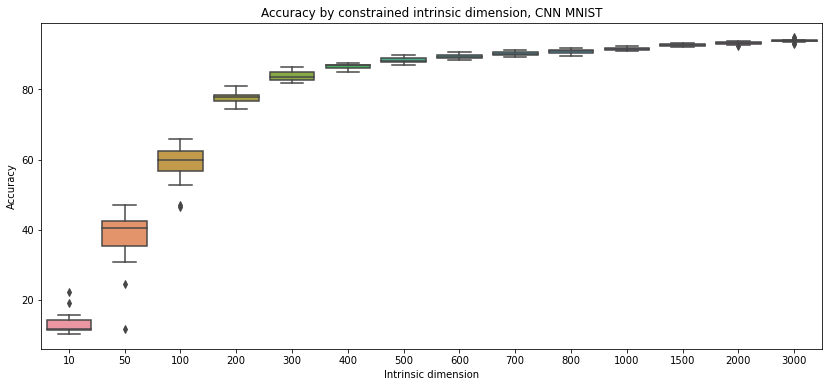

In [8]:
plt.figure(figsize=(14, 6))
sns.boxplot(data=tidydf, x="num_id", y="acc")
plt.xlabel("Intrinsic dimension")
plt.ylabel("Accuracy")
plt.title("Accuracy by constrained intrinsic dimension, CNN MNIST")
plt.show()